In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/chunks_info.csv')
print(len(df))
df.head()

10726


,chunk_id,sha,fileSize
0,776662,332b6ed4e324199565e235cd915368f9bc1b43d2,204.0
1,776782,b9e82842917f541594a67c44639201895caa4b28,251.0
2,776793,b9e82842917f541594a67c44639201895caa4b28,1001.0
3,776828,bcd0ef81a0a8b9f64ea644e434d299585b4dbc75,514.0
4,776863,30c4b21552ad0db4e3ed3fe8dfed3e702945851a,782.0


In [3]:
df2 = pd.read_csv('data/partial_order_result.csv')
df2.head()

,chunk_id,partial_order,chunk_size,resolution_size
0,776662,True,18,12
1,776782,True,113,101
2,776793,True,6,5
3,776828,True,5,3
4,776863,True,6,5


In [4]:
df = pd.merge(df, df2, on = ['chunk_id'])

In [5]:
df3 = pd.read_csv('data/resolution_composition.csv')
df3.head()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0


In [6]:
df = pd.merge(df, df3, on=['chunk_id'])
df.head()

,chunk_id,sha,fileSize,partial_order,chunk_size,resolution_size,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,332b6ed4e324199565e235cd915368f9bc1b43d2,204.0,True,18,12,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,b9e82842917f541594a67c44639201895caa4b28,251.0,True,113,101,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,b9e82842917f541594a67c44639201895caa4b28,1001.0,True,6,5,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,bcd0ef81a0a8b9f64ea644e434d299585b4dbc75,514.0,True,5,3,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,30c4b21552ad0db4e3ed3fe8dfed3e702945851a,782.0,True,6,5,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0


In [7]:
df['chunk_size'] = df['v1_size'] + df['v2_size']
df.head()

,chunk_id,sha,fileSize,partial_order,chunk_size,resolution_size,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,332b6ed4e324199565e235cd915368f9bc1b43d2,204.0,True,18,12,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,b9e82842917f541594a67c44639201895caa4b28,251.0,True,86,101,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,b9e82842917f541594a67c44639201895caa4b28,1001.0,True,5,5,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,bcd0ef81a0a8b9f64ea644e434d299585b4dbc75,514.0,True,5,3,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,30c4b21552ad0db4e3ed3fe8dfed3e702945851a,782.0,True,5,5,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0


In [8]:
df = df[['chunk_id', 'fileSize', 'resolution_size', 'chunk_size', 'sha', 'v1_size', 'v2_size' ]]
print(len(df))
df.head()

10726


,chunk_id,fileSize,resolution_size,chunk_size,sha,v1_size,v2_size
0,776662,204.0,12,18,332b6ed4e324199565e235cd915368f9bc1b43d2,6,12
1,776782,251.0,101,86,b9e82842917f541594a67c44639201895caa4b28,33,53
2,776793,1001.0,5,5,b9e82842917f541594a67c44639201895caa4b28,4,1
3,776828,514.0,3,5,bcd0ef81a0a8b9f64ea644e434d299585b4dbc75,3,2
4,776863,782.0,5,5,30c4b21552ad0db4e3ed3fe8dfed3e702945851a,1,4


## RQ2. What is the distribution in size of conflicting chunks and conflicting files as measured in lines of code (LOC)?

In [9]:
df['fileSize'].describe()

count    10420.000000
mean       860.021209
std       1556.208681
min         15.000000
25%        182.000000
50%        384.000000
75%        889.250000
max      20445.000000
Name: fileSize, dtype: float64

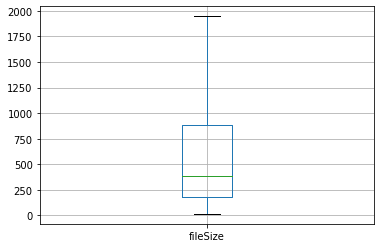

In [10]:
df.boxplot(['fileSize'], showfliers=False)

In [11]:
df[['chunk_size', 'v1_size', 'v2_size']].describe()

,chunk_size,v1_size,v2_size
count,10726.000000,10726.000000,10726.000000
mean,13.555379,6.668842,6.886537
std,58.866576,29.755920,32.439524
min,2.000000,0.000000,0.000000
25%,4.000000,2.000000,2.000000
50%,6.000000,2.000000,3.000000
75%,11.000000,5.000000,5.000000
max,2545.000000,1352.000000,1402.000000


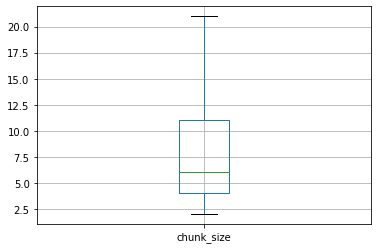

In [12]:
df.boxplot(['chunk_size'], showfliers=False)

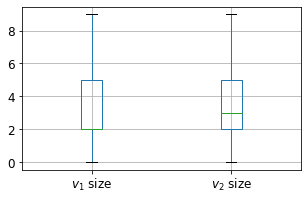

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
df.boxplot(['v1_size', 'v2_size'], showfliers=False, ax = ax)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_xticklabels(['$v_{1}$ size', '$v_{2}$ size'])
plt.show()
fig.savefig('figures/rq2_v1_v2_size.png', dpi=300, bbox_inches = "tight")

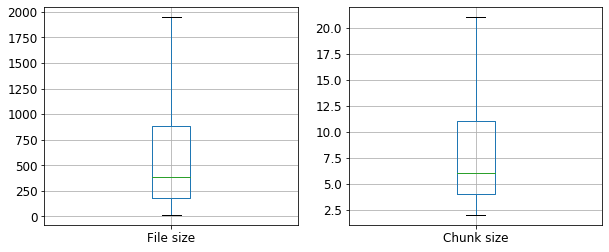

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df.boxplot(['fileSize'], showfliers=False, ax=ax[0])
df.boxplot(['chunk_size'], showfliers=False, ax=ax[1])
ax[0].tick_params(axis="x", labelsize=12)
ax[0].tick_params(axis="y", labelsize=12)
ax[1].tick_params(axis="x", labelsize=12)
ax[1].tick_params(axis="y", labelsize=12)
ax[0].set_xticklabels(['File size'])
ax[1].set_xticklabels(['Chunk size'])
plt.show()
fig.savefig('figures/rq2_distribution.png', dpi=300, bbox_inches = "tight")

## RQ3. What is the distribution in size of conflicting chunks resolutions as measured in lines of code (LOC)?

In [15]:
df['resolution_size'].describe()

count    10726.000000
mean         8.379079
std         35.503146
min          1.000000
25%          2.000000
50%          3.000000
75%          7.000000
max       1557.000000
Name: resolution_size, dtype: float64

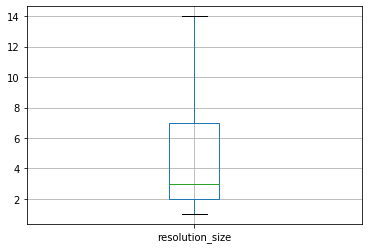

In [16]:
df.boxplot(['resolution_size'], showfliers=False)

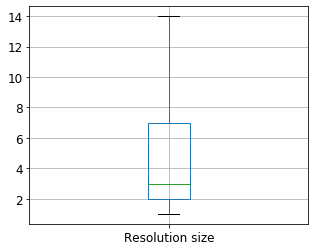

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
df.boxplot(['resolution_size'], showfliers=False, ax=ax)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_xticklabels(['Resolution size'])
plt.show()
fig.savefig('figures/rq3_distribution.png', dpi=300, bbox_inches = "tight")

## RQ1. What is the distribution in number of conflicting chunks and conflicting files for merge failures?

In [18]:
df_merges = pd.read_csv('data/merge_stats.csv')
print(len(df_merges))
df_merges.head()

5360


,sha,chunks,files
0,346418c4ef7b9a21dc659af43ff614d5db2343f9,137,129
1,70a4e7915b9e70ffc6adeab0bca620339e97673c,80,24
2,cdaaddf88b9ab1dda6b5bf859b38bca6055b057b,71,11
3,b013a74c44b526ba9f824cc7eb2087714d9b6eaf,65,1
4,ab780c16ee9d29b98ea6e240c21076d2f1ae6079,62,38


In [19]:
df_merges['chunks'].describe()

count    5360.000000
mean        2.001119
std         3.501392
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       137.000000
Name: chunks, dtype: float64

In [20]:
df_merges['chunks'].value_counts(normalize=True)

1      0.648134
2      0.175560
3      0.068097
4      0.037687
5      0.025187
6      0.011194
7      0.008022
8      0.004851
9      0.004104
10     0.003172
11     0.002425
12     0.002052
14     0.001679
16     0.001493
13     0.001306
15     0.000933
24     0.000746
28     0.000373
25     0.000373
17     0.000373
18     0.000373
51     0.000187
80     0.000187
44     0.000187
36     0.000187
65     0.000187
137    0.000187
20     0.000187
22     0.000187
62     0.000187
71     0.000187
Name: chunks, dtype: float64

In [21]:
df_merges[df_merges['chunks'] >= 18]

,sha,chunks,files
0,346418c4ef7b9a21dc659af43ff614d5db2343f9,137,129
1,70a4e7915b9e70ffc6adeab0bca620339e97673c,80,24
2,cdaaddf88b9ab1dda6b5bf859b38bca6055b057b,71,11
3,b013a74c44b526ba9f824cc7eb2087714d9b6eaf,65,1
4,ab780c16ee9d29b98ea6e240c21076d2f1ae6079,62,38
5,1228a9fe55582f99afff2c356408008b069c704b,51,37
6,7a1355950172b7a549820e9a2cd4a9b2099ec32f,44,24
7,a7a71986ec8f4c9d0dbe9fd0dc0c5c2f46f4e5ad,36,30
8,e407a608b0e2c7aad5cd6321426ec85d35f3bafa,28,10
9,c8572d38a6d9293a7fd8b050a4016cf79727edc4,28,25


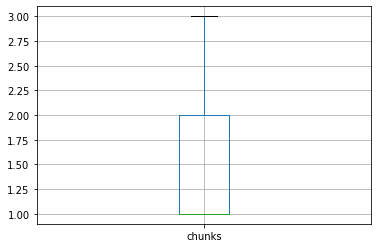

In [22]:
df_merges.boxplot('chunks', showfliers=False)

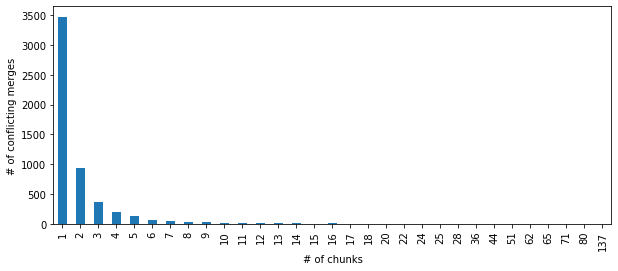

In [23]:
data = []
max_chunks = df_merges['chunks'].max()
for chunks_amount in range(1, max_chunks+1):
    merges_count = len(df_merges[df_merges['chunks'] == chunks_amount])
    if merges_count > 0:
        data.append([chunks_amount, merges_count])

df_plot = pd.DataFrame(data, columns=['chunks','merges'])
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
df_plot.plot(kind='bar', x='chunks', y='merges', ax=ax, legend=False)
ax.set_xlabel("# of chunks")
ax.set_ylabel("# of conflicting merges")
plt.show()

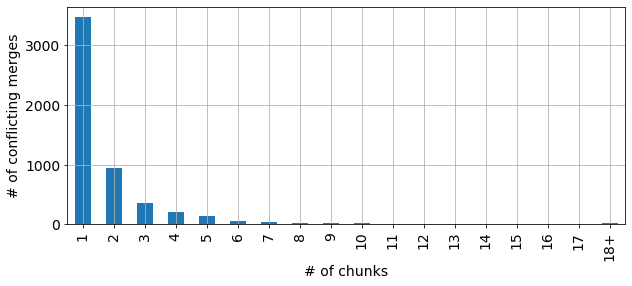

In [24]:
data = []
max_chunks = df_merges['chunks'].max()
more_than_18 = 0
for chunks_amount in range(1, 18):
    merges_count = len(df_merges[df_merges['chunks'] == chunks_amount])
    if merges_count > 0:
        data.append([chunks_amount, merges_count])

merges_count = len(df_merges[df_merges['chunks'] >= 18])     
data.append(['18+', merges_count]) 

df_plot = pd.DataFrame(data, columns=['chunks','merges'])
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
df_plot.plot(kind='bar', x='chunks', y='merges', ax=ax, legend=False, zorder=1)
ax.set_xlabel("# of chunks", fontsize=14)
ax.set_ylabel("# of conflicting merges", fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.grid(zorder=-1)
plt.show()
fig.savefig('figures/chunks_per_merge.png', dpi=300, bbox_inches = "tight")

In [25]:
df_merges['files'].describe()

count    5360.000000
mean        1.640112
std         2.491515
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       129.000000
Name: files, dtype: float64

In [26]:
df_merges['files'].value_counts(normalize=True)

1      0.737313
2      0.141231
3      0.052985
4      0.022201
5      0.018470
6      0.010261
7      0.004478
8      0.003358
10     0.002239
9      0.001493
12     0.000933
11     0.000746
13     0.000560
16     0.000560
24     0.000560
15     0.000560
14     0.000560
21     0.000187
25     0.000187
129    0.000187
20     0.000187
18     0.000187
30     0.000187
38     0.000187
37     0.000187
Name: files, dtype: float64

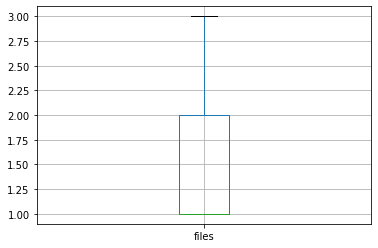

In [27]:
df_merges.boxplot('files', showfliers=False)

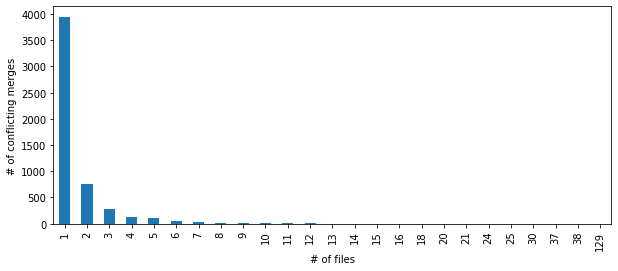

In [28]:
data = []
max_files = df_merges['files'].max()
for files_count in range(1, max_files+1):
    merges_count = len(df_merges[df_merges['files'] == files_count])
    if merges_count > 0:
        data.append([files_count, merges_count])

df_plot = pd.DataFrame(data, columns=['files_count','merges'])
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
df_plot.plot(kind='bar', x='files_count', y='merges', ax=ax, legend=False)
ax.set_xlabel("# of files")
ax.set_ylabel("# of conflicting merges")
plt.show()

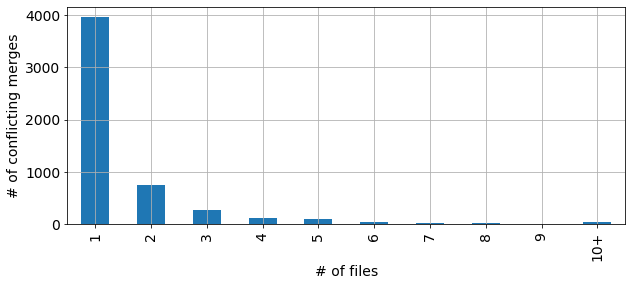

In [29]:
data = []
max_files = df_merges['files'].max()
for files_count in range(1, 10):
    merges_count = len(df_merges[df_merges['files'] == files_count])
    if merges_count > 0:
        data.append([files_count, merges_count])
merges_count = len(df_merges[df_merges['files'] >= 10])
data.append(['10+', merges_count]) 
df_plot = pd.DataFrame(data, columns=['files_count','merges'])
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
df_plot.plot(kind='bar', x='files_count', y='merges', ax=ax, legend=False)
ax.set_xlabel("# of files", fontsize=14)
ax.set_ylabel("# of conflicting merges", fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.grid(zorder=-1)
plt.show()
fig.savefig('figures/files_per_merge.png', dpi=300, bbox_inches = "tight")

#### What is the average size of chunks for failed merges with varying number of chunks?

In [30]:
df_filter = df_merges[df_merges['chunks'] == 3]
df_filter.head()


,sha,chunks,files
580,99fb70b0b7676b4abf6425c9ffb181f4ac1ddde9,3,2
581,cc6d271f31606d8e407167570a8a9c1517df7a9f,3,3
582,a5cbd05ff39886a405da97be0417d6aa9bfe04bf,3,1
583,5414e4328f4862f28e679541c97dfa90abf54139,3,2
584,6ded402d219f4be75d040cb7c5ea0a670af3eb57,3,2


In [31]:
df[df['sha'] == "99fb70b0b7676b4abf6425c9ffb181f4ac1ddde9"]

,chunk_id,fileSize,resolution_size,chunk_size,sha,v1_size,v2_size
2554,940508,935.0,3,11,99fb70b0b7676b4abf6425c9ffb181f4ac1ddde9,8,3
2555,940509,378.0,3,4,99fb70b0b7676b4abf6425c9ffb181f4ac1ddde9,1,3
2556,940510,378.0,2,3,99fb70b0b7676b4abf6425c9ffb181f4ac1ddde9,1,2


In [32]:
data = []
for chunks_number in range(1, 18):
    total_size = 0
    total_chunks = 0
    df_filter = df_merges[df_merges['chunks'] == chunks_number] # selects all merges that have 'chunks_number' chunks
    if len(df_filter) > 0:
        for index, row in df_filter.iterrows():
            rows = df[df['sha'] == row['sha']]
            total_chunks+=len(rows)
            total_size+=rows['chunk_size'].sum()
        data.append([chunks_number, total_chunks, total_size])

df_filter = df_merges[df_merges['chunks'] >= 18]
if len(df_filter) > 0:
    for index, row in df_filter.iterrows():
        rows = df[df['sha'] == row['sha']]
        total_chunks+=len(rows)
        total_size+=rows['chunk_size'].sum()
    data.append(['18+', total_chunks, total_size])

        
print(*data)

[1, 3474, 64895] [2, 1882, 21228] [3, 1095, 16287] [4, 808, 10484] [5, 675, 6866] [6, 360, 3534] [7, 301, 4351] [8, 208, 1813] [9, 198, 1848] [10, 170, 955] [11, 143, 1018] [12, 132, 971] [13, 91, 989] [14, 126, 1465] [15, 75, 569] [16, 128, 1089] [17, 34, 287] ['18+', 860, 7033]


In [33]:
df_plot = pd.DataFrame(data, columns=['chunks', 'total_chunks', 'total_size'])
df_plot['average_size'] = df_plot['total_size'] / df_plot['total_chunks']
df_plot.head()

,chunks,total_chunks,total_size,average_size
0,1,3474,64895,18.680196
1,2,1882,21228,11.279490
2,3,1095,16287,14.873973
3,4,808,10484,12.975248
4,5,675,6866,10.171852


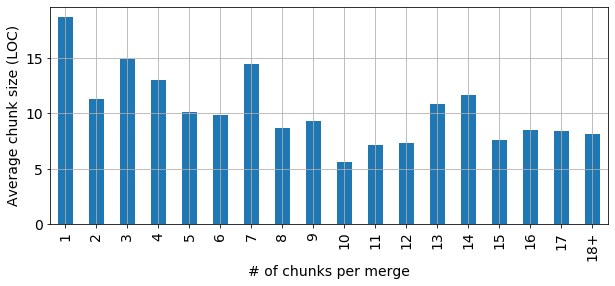

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
df_plot.plot(kind='bar', x='chunks', y='average_size', ax=ax, legend=False)
ax.set_xlabel("# of chunks per merge", fontsize=14)
ax.set_ylabel("Average chunk size (LOC)", fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.grid(zorder=-1)
plt.show()
# fig.savefig('figures/average_size_per_chunks_per_merge.png', dpi=300, bbox_inches = "tight")

In [35]:
data = []
for chunks_number in range(1, 18):
    total_size = 0
    total_chunks = 0
    df_filter = df_merges[df_merges['chunks'] == chunks_number] # selects all merges that have 'chunks_number' chunks
    if len(df_filter) > 0:
        for index, row in df_filter.iterrows():
            rows = df[df['sha'] == row['sha']]
            total_chunks+=len(rows)
            total_size+=rows['chunk_size'].sum()
        data.append([chunks_number, total_chunks, total_size])

df_filter = df_merges[df_merges['chunks'] >= 18]
if len(df_filter) > 0:
    for index, row in df_filter.iterrows():
        rows = df[df['sha'] == row['sha']]
        total_chunks+=len(rows)
        total_size+=rows['chunk_size'].sum()
    data.append([18, total_chunks, total_size])

df_plot2 = pd.DataFrame(data, columns=['chunks', 'total_chunks', 'total_size'])
df_plot2['average_size'] = df_plot2['total_size'] / df_plot2['total_chunks']
df_plot2.head()



,chunks,total_chunks,total_size,average_size
0,1,3474,64895,18.680196
1,2,1882,21228,11.279490
2,3,1095,16287,14.873973
3,4,808,10484,12.975248
4,5,675,6866,10.171852


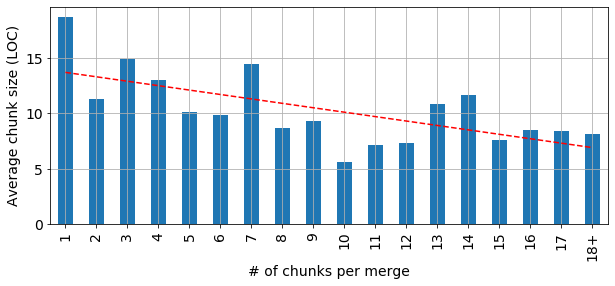

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
df_plot.plot(kind='bar', x='chunks', y='average_size', ax=ax, legend=False)
ax.set_xlabel("# of chunks per merge", fontsize=14)
ax.set_ylabel("Average chunk size (LOC)", fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.grid(zorder=-1)


x = list(df_plot2['chunks'])
y = list(df_plot2['average_size'])
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(range(0, 18),p(x),"r--")

plt.show()
fig.savefig('figures/average_size_per_chunks_per_merge.png', dpi=300, bbox_inches = "tight")